In [1]:
# pip install fbprophet

In [2]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import os

### Loading all datasets to one dataframe

In [3]:
path = './dataset/'       
all_files = glob.glob(os.path.join(path, "*.csv"))  

df_from_each_file = []
for f in all_files:
    tmp_df = pd.read_csv(f)
    
    # Data seperated by ';' we need to create seperate columns
    tmp_df = pd.DataFrame(
        tmp_df['Date;Price min;Price max'].str.split(';').tolist(),
        columns = ['date', 'min_price', 'max_price']
    )
    # add item column
    item = f.strip().split('.')[1].split('\\')[1]
    tmp_df['item'] = item
    df_from_each_file.append(tmp_df)
df   = pd.concat(df_from_each_file, ignore_index=True)

In [4]:
df.head()

date min_price max_price   item
0  08-02-2022       0.8       2.9  apple
1  04-01-2022       1.0       2.9  apple
2  03-11-2021       1.0       2.6  apple
3  11-10-2021       1.0       2.4  apple
4  08-09-2021       1.4       3.0  apple

Change index to date column

In [5]:
df.set_index('date', inplace=True)

In [6]:
df.index

Index(['08-02-2022', '04-01-2022', '03-11-2021', '11-10-2021', '08-09-2021',
       '16-08-2021', '09-08-2021', '02-08-2021', '26-07-2021', '23-07-2021',
       ...
       '23-04-2014', '22-04-2014', '17-04-2014', '16-04-2014', '15-04-2014',
       '14-04-2014', '03-04-2014', '01-04-2014', '17-03-2014', '11-03-2014'],
      dtype='object', name='date', length=3992)

Index column dtype is objects so changing it to DateTime

In [7]:
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['2022-08-02', '2022-04-01', '2021-03-11', '2021-11-10',
               '2021-08-09', '2021-08-16', '2021-09-08', '2021-02-08',
               '2021-07-26', '2021-07-23',
               ...
               '2014-04-23', '2014-04-22', '2014-04-17', '2014-04-16',
               '2014-04-15', '2014-04-14', '2014-03-04', '2014-01-04',
               '2014-03-17', '2014-11-03'],
              dtype='datetime64[ns]', name='date', length=3992, freq=None)

Let’s say I want to get all the data from 2019-01-01 till 2020-05-01. In order to do this, we can simply use indexing in Pandas like this.

In [8]:
df.loc['2019-01-01':'2020-01-01']

min_price max_price        item
date                                      
2019-12-13       1.1       2.1       apple
2019-05-10       1.1       1.9       apple
2019-08-05       1.0       2.2       apple
2019-02-10       0.0       0.0     apricot
2019-06-18       1.6       2.5     apricot
...              ...       ...         ...
2019-01-30       3.0       3.8      tomato
2019-05-10       0.0       0.0  watermelon
2019-02-10      0.65       0.9  watermelon
2019-06-18       0.7       0.9  watermelon
2019-05-20       1.2       1.4  watermelon

[156 rows x 3 columns]

In [9]:
df['min_price'] = pd.to_numeric(df['min_price'], downcast='float')
df['max_price'] = pd.to_numeric(df['max_price'], downcast='float')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3992 entries, 2022-08-02 to 2014-11-03
Data columns (total 3 columns):
min_price    3992 non-null float32
max_price    3992 non-null float32
item         3992 non-null object
dtypes: float32(2), object(1)
memory usage: 173.6+ KB


### Record Distribution

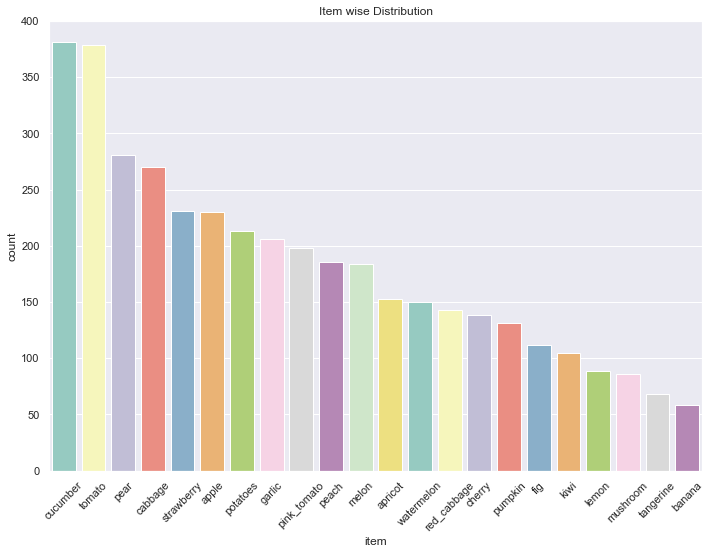

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="darkgrid")
ax = sns.countplot(
    x='item',  
    data=df,
    palette='Set3',
    order=df['item'].value_counts().index # sort the data
)
plt.xticks(rotation=45)
ax.set_title('Item wise Distribution')
plt.show()

### Item wise price distribution

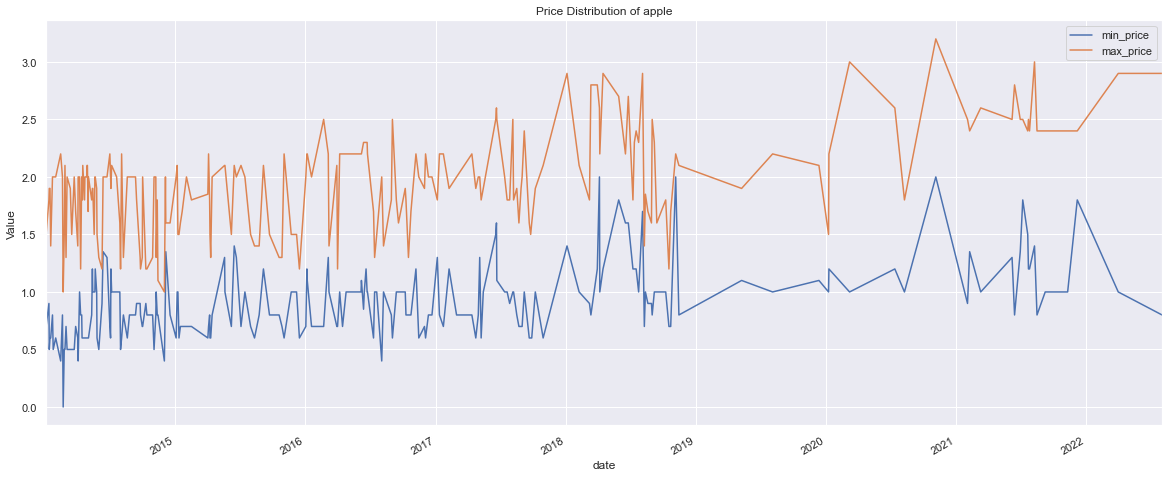

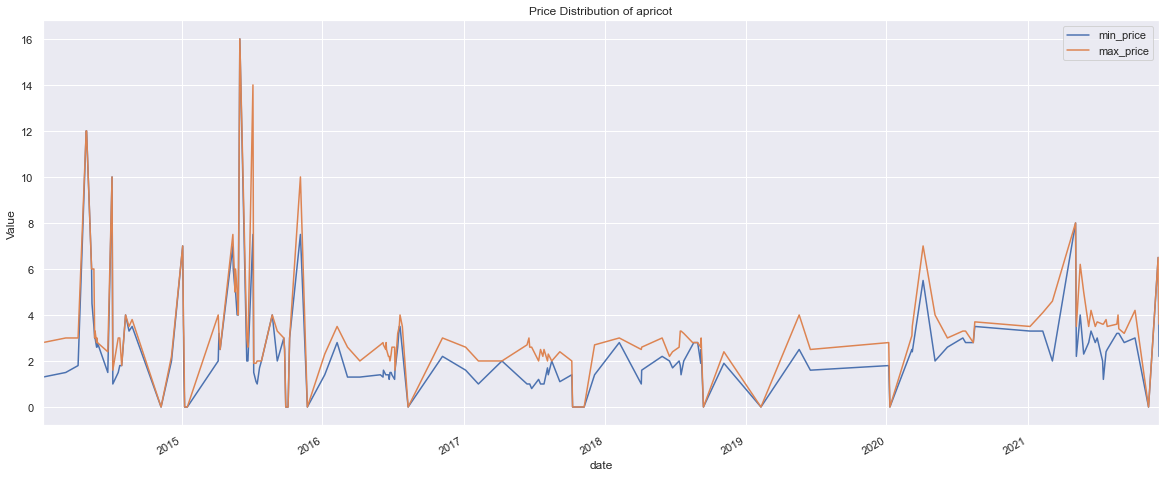

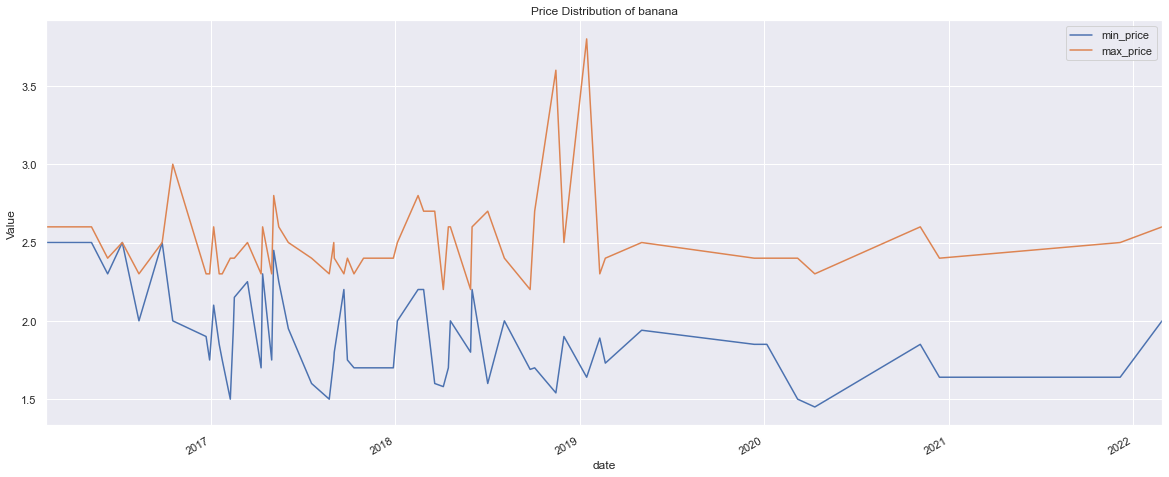

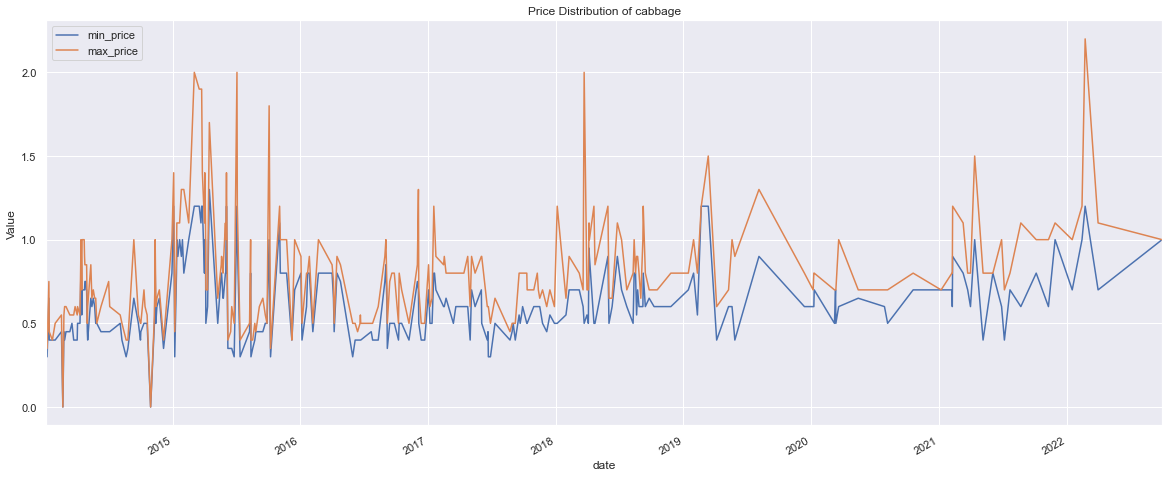

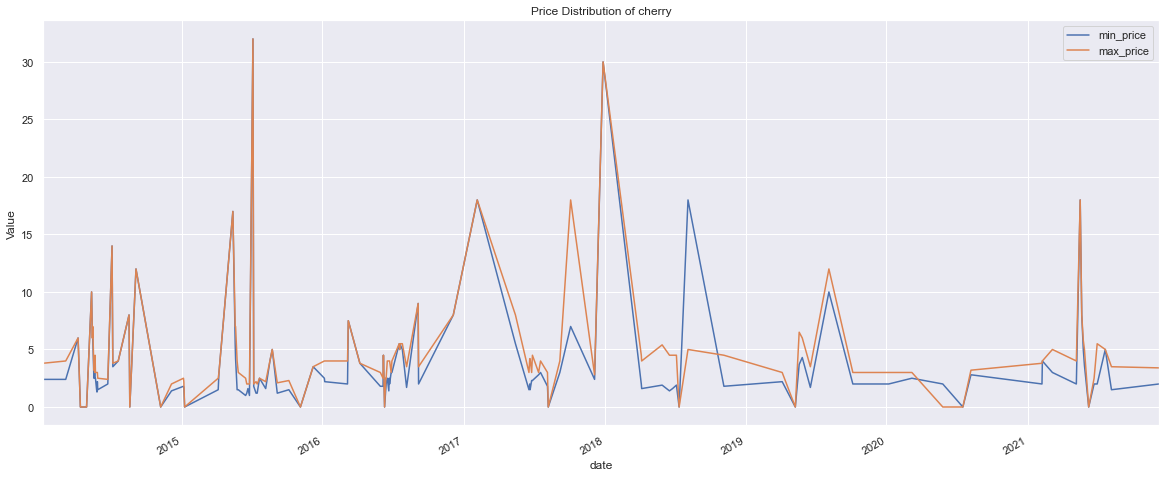

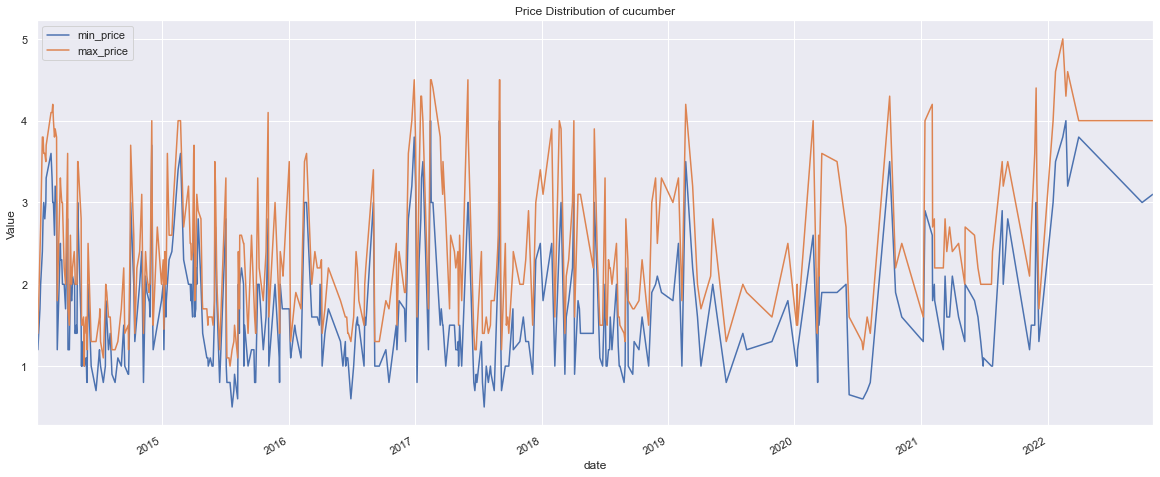

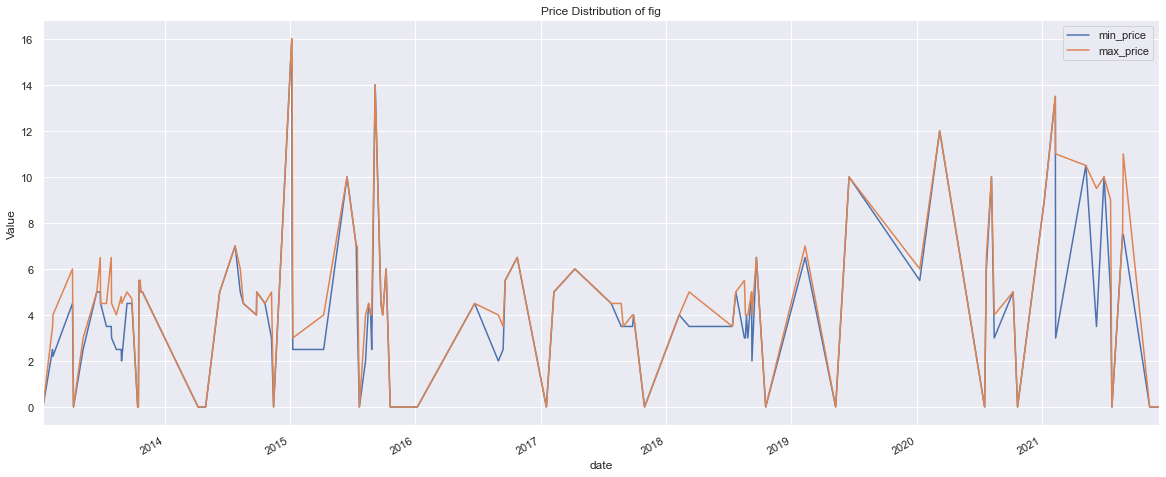

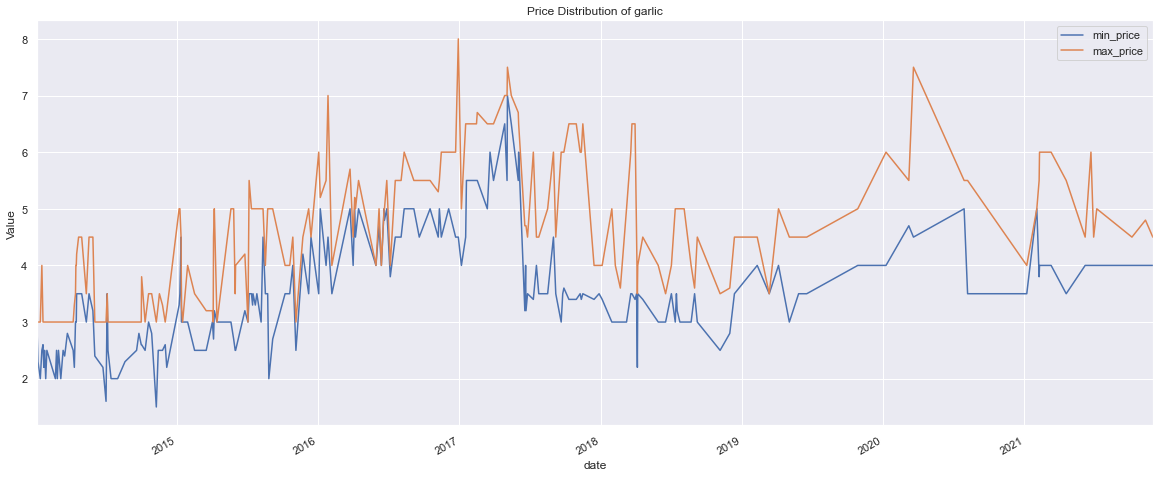

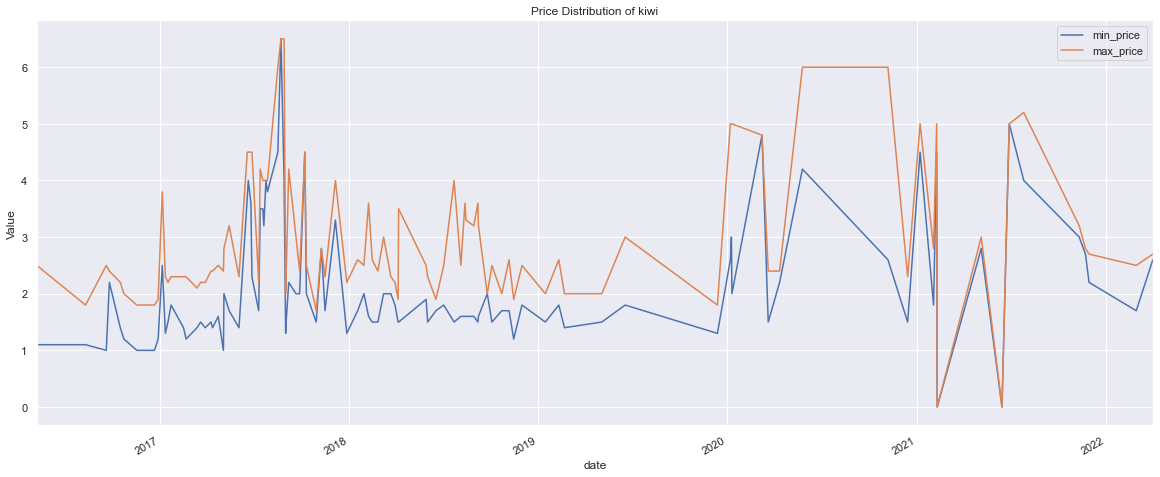

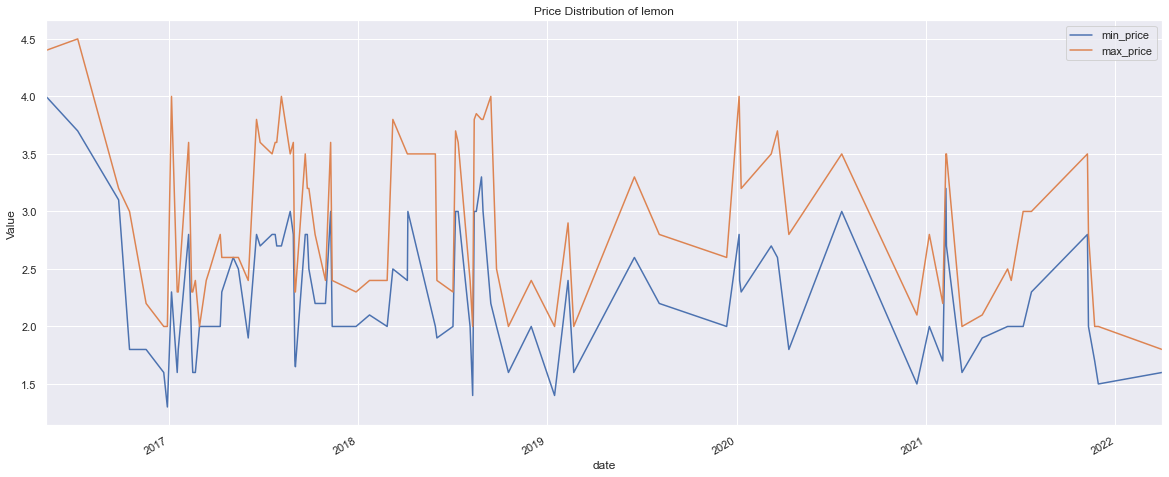

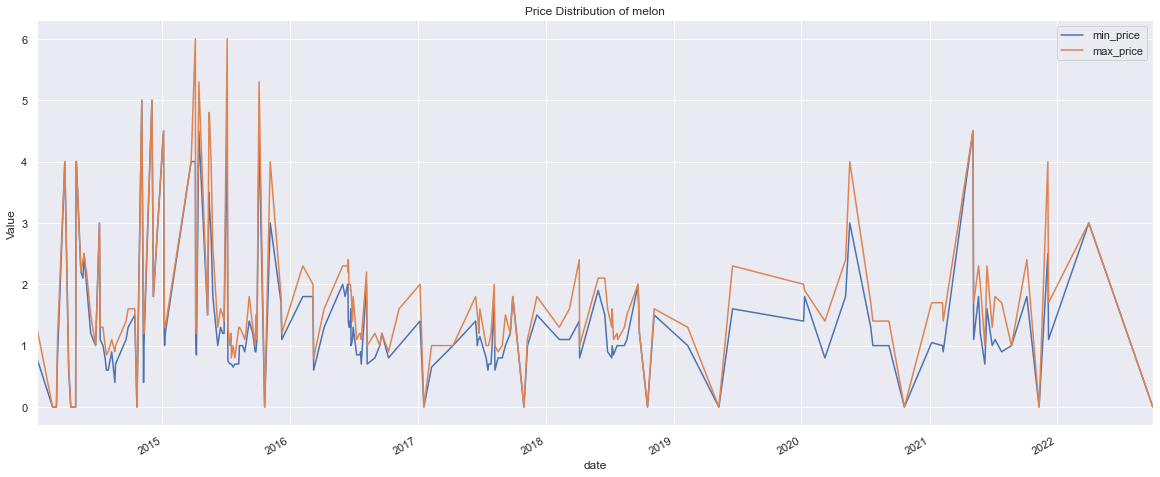

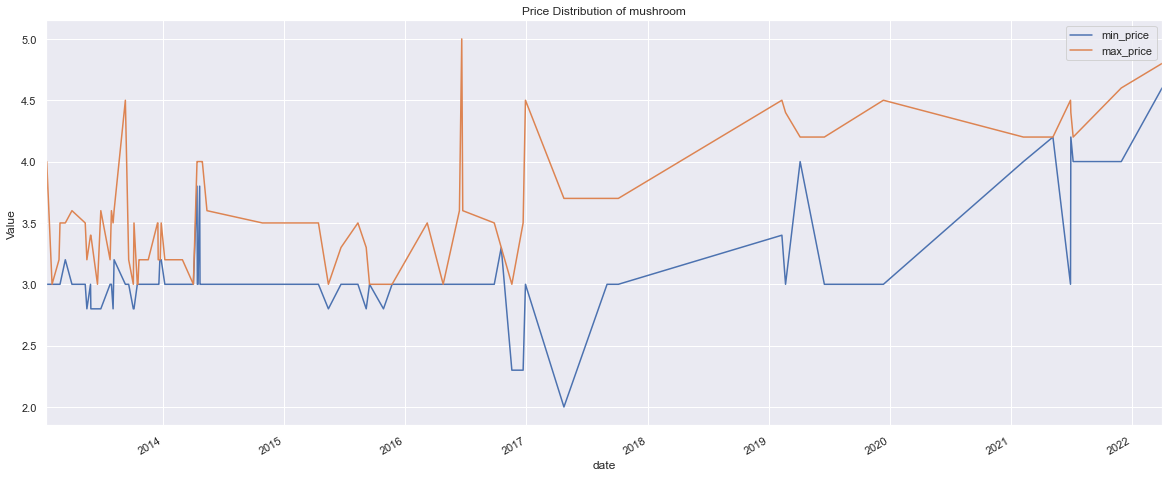

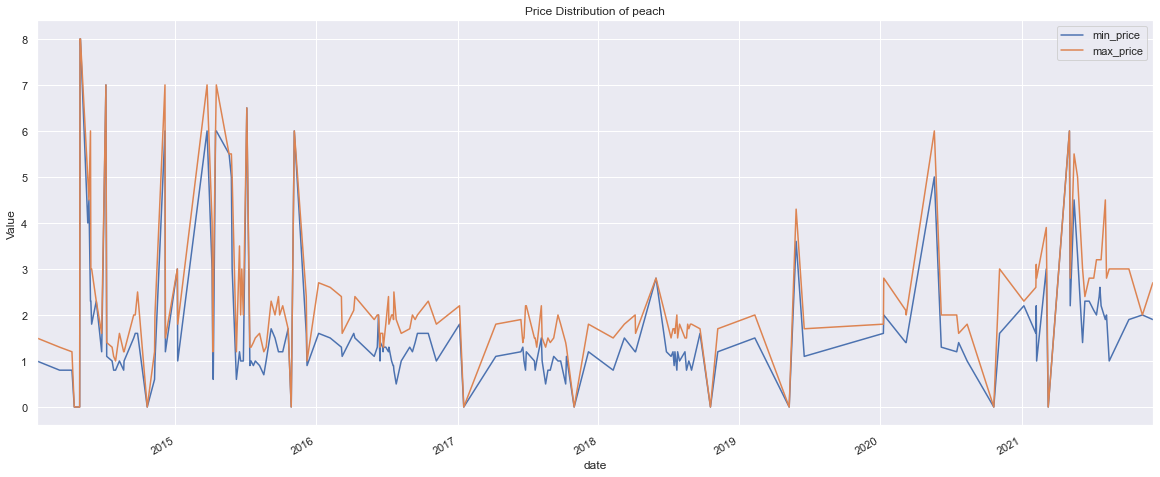

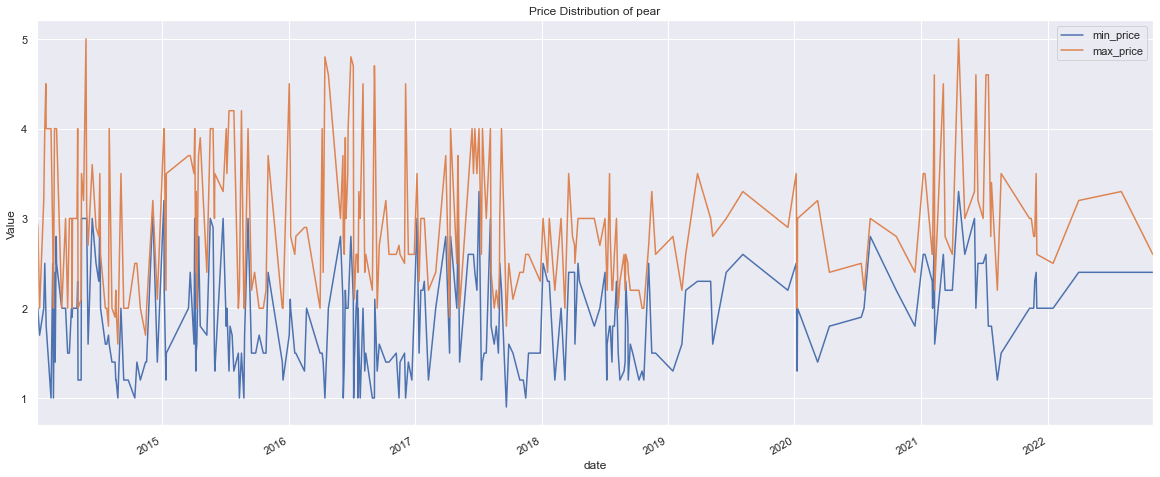

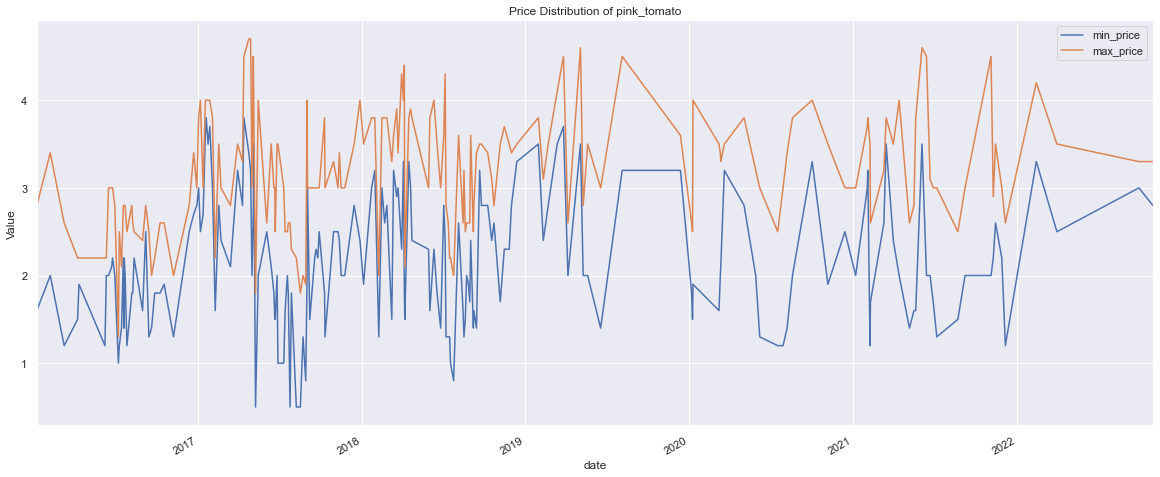

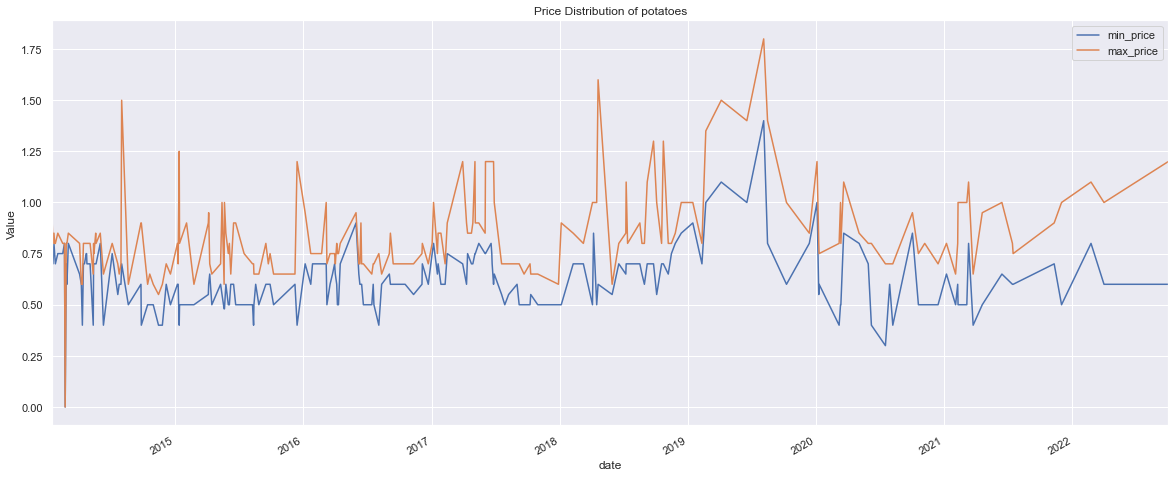

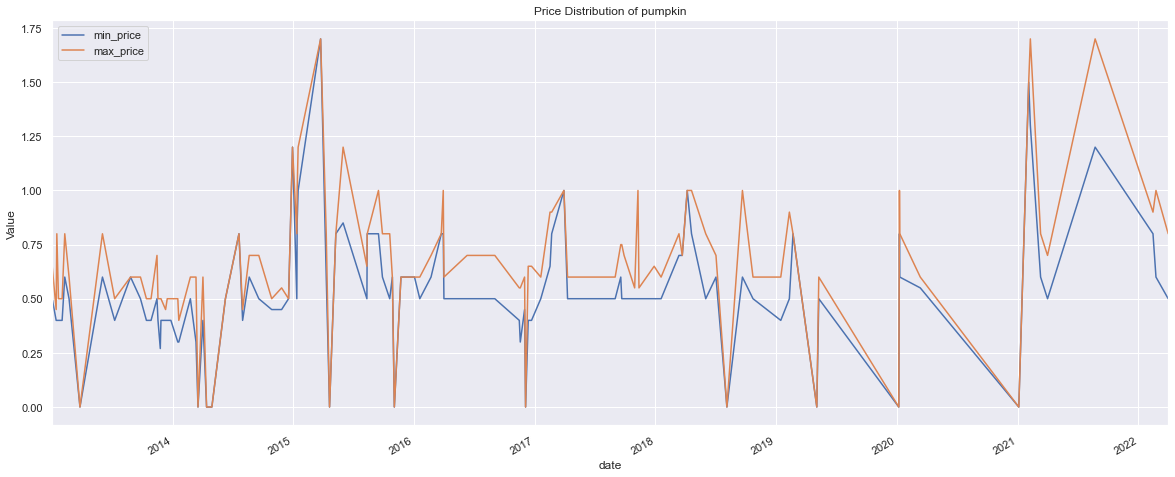

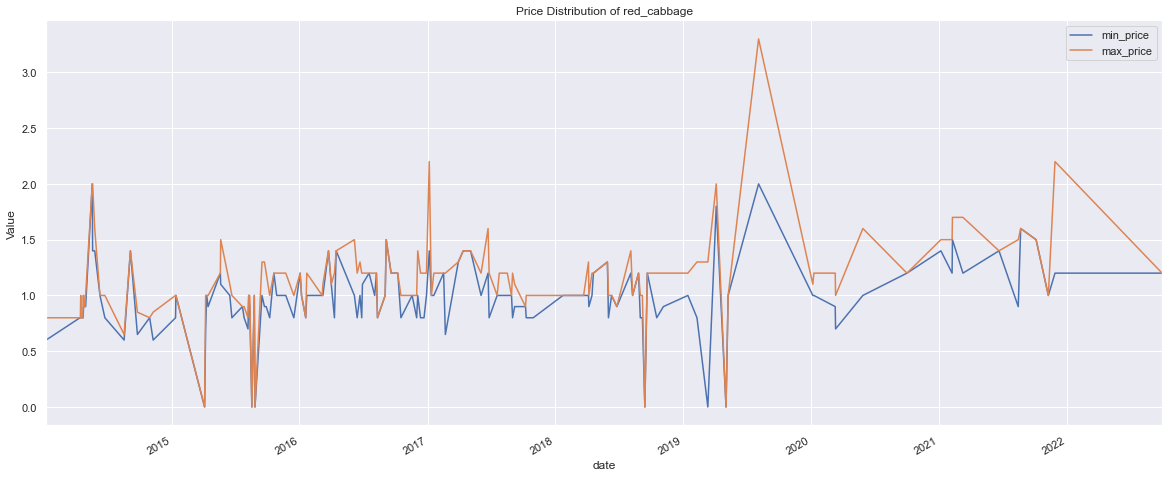

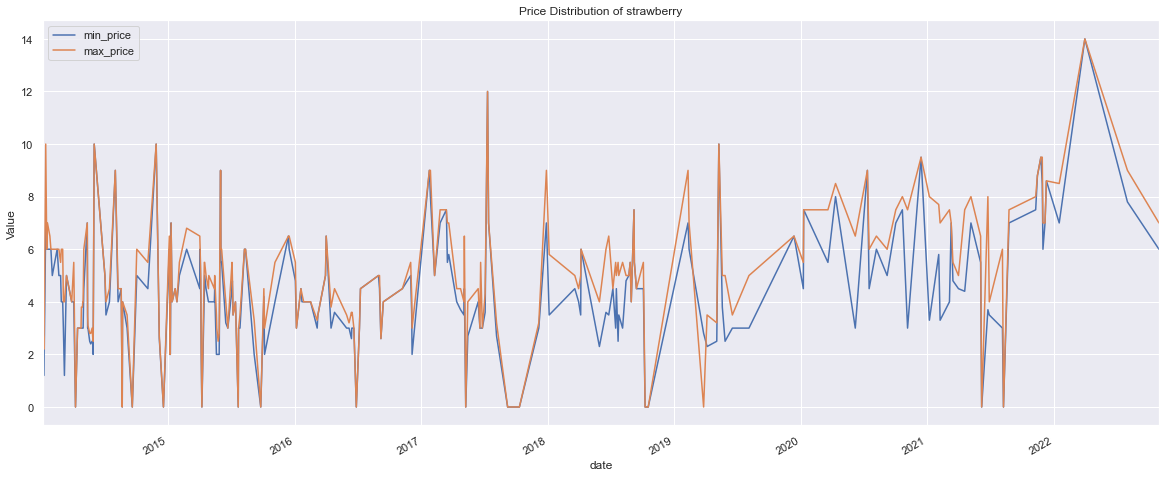

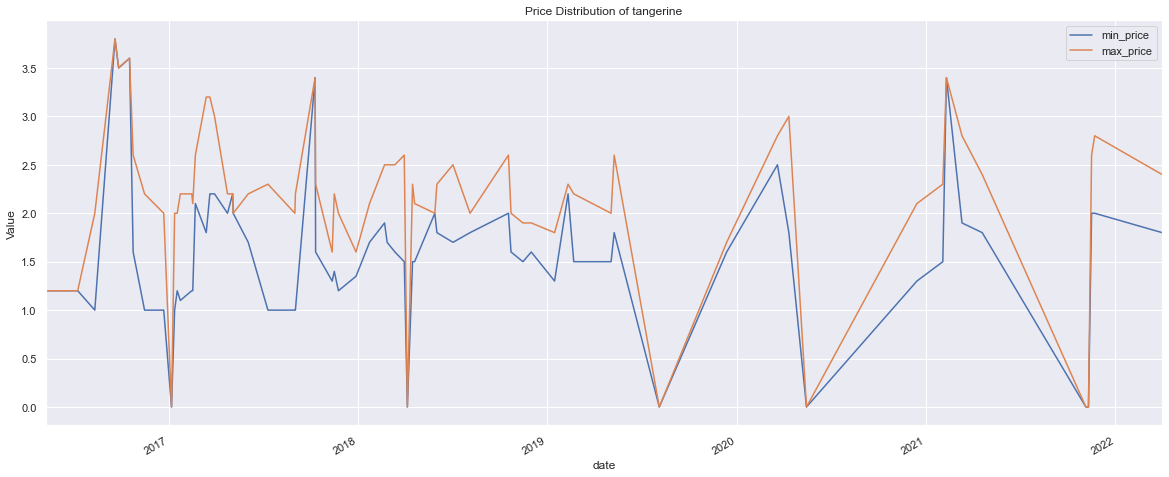

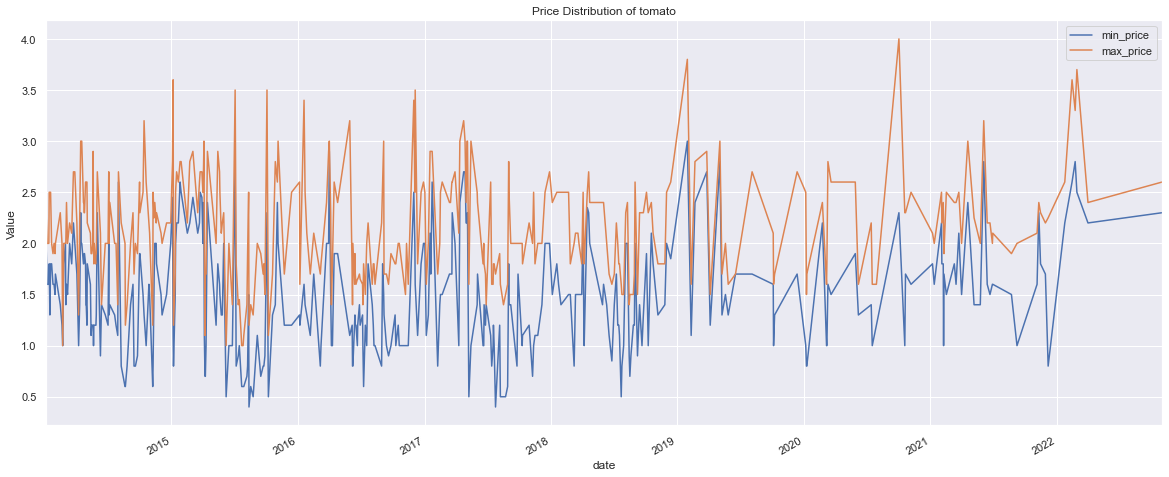

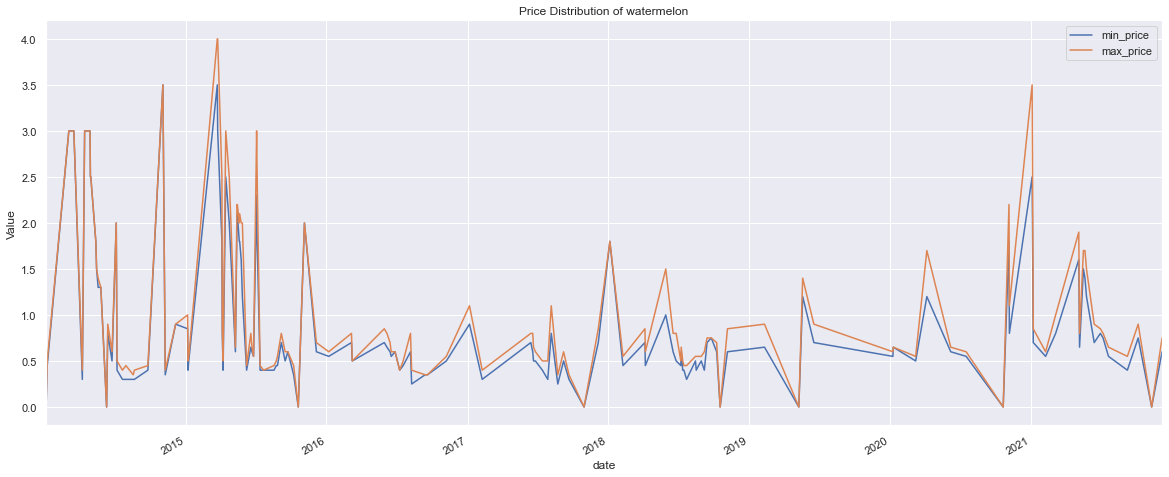

In [12]:
for item in df['item'].unique():

    sns.set(rc={'figure.figsize':(20,8.27)})
    sns.set_theme(style="darkgrid")
    
    item_df = df.loc[df['item'] == item
                    ]
    ax = item_df.plot()
    ax.set(title='Price Distribution of {}'.format(item), ylabel='Value')
    plt.show()

### Time Series Index Wise

> Time series index are:
> - M = Month End
> - A = Year-End
> - MS = Month Start
> - AS = Year Start

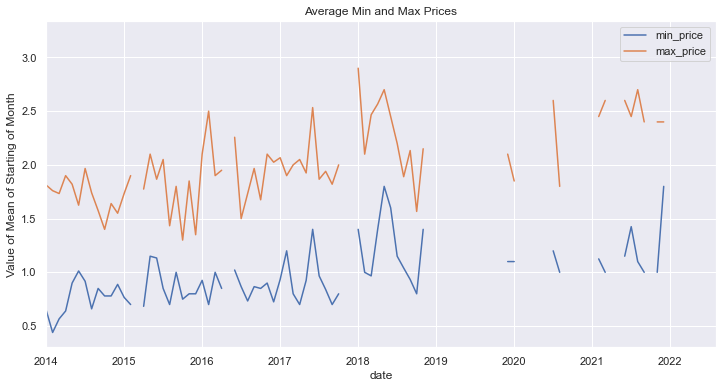

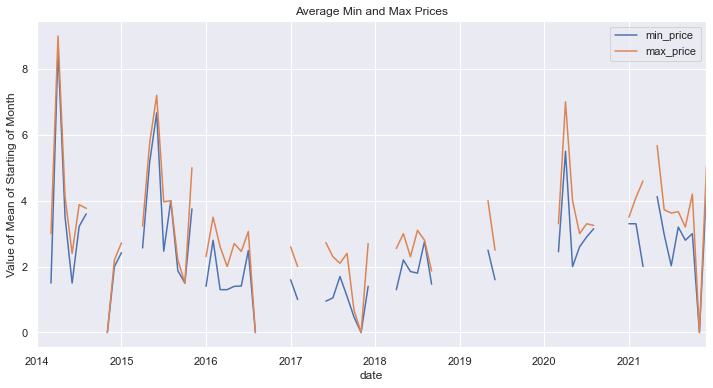

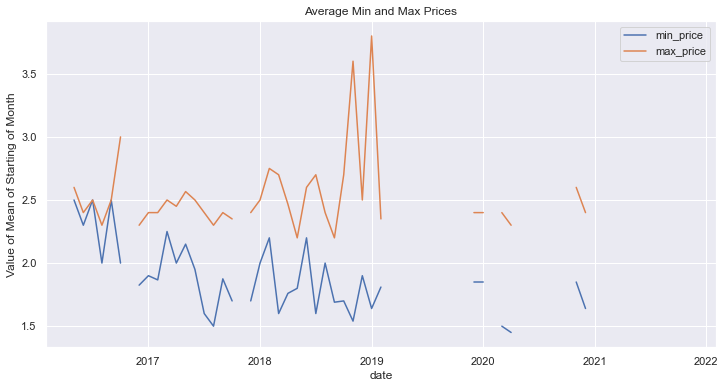

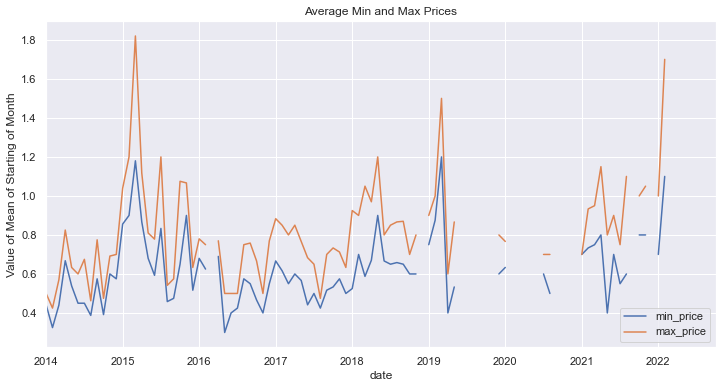

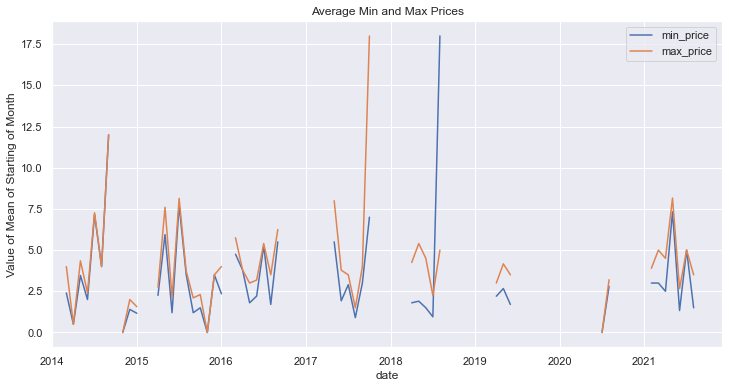

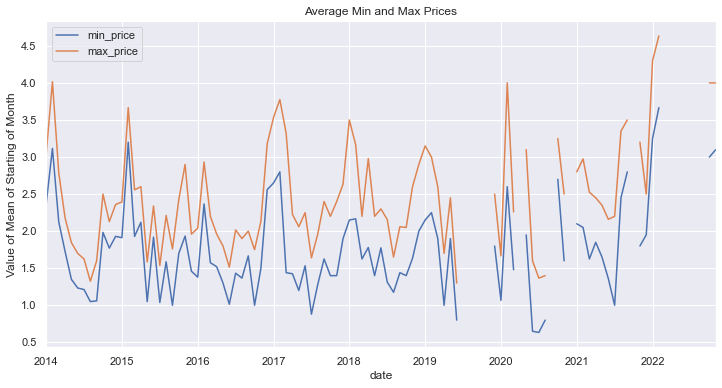

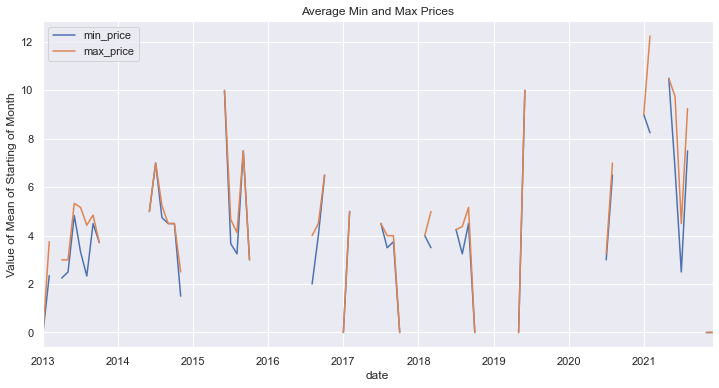

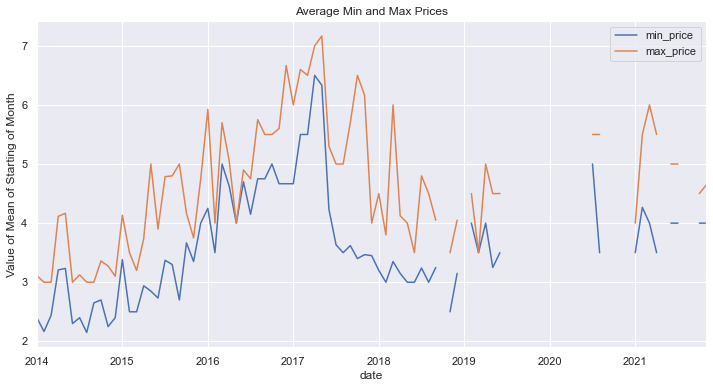

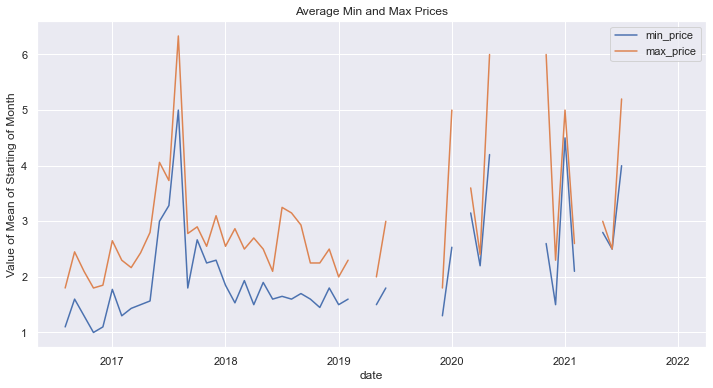

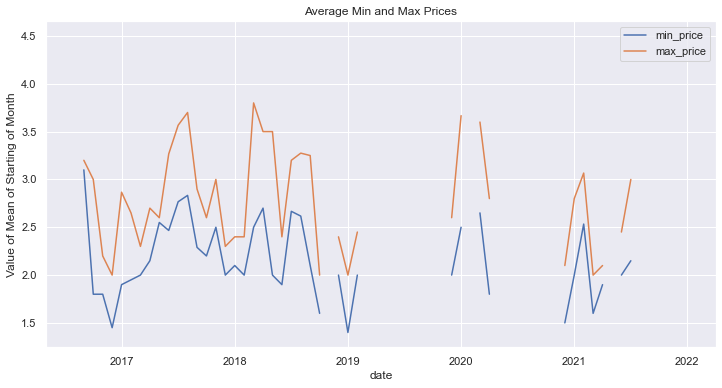

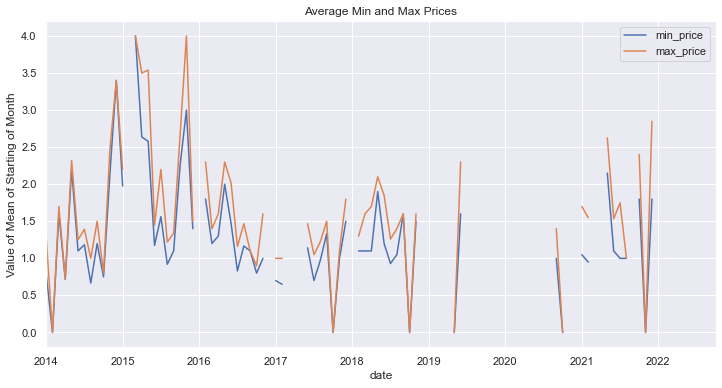

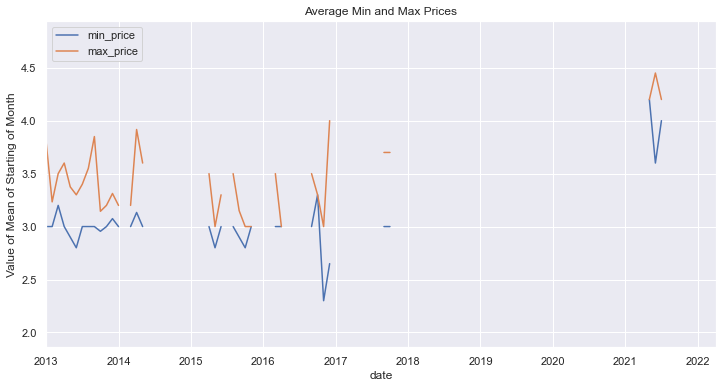

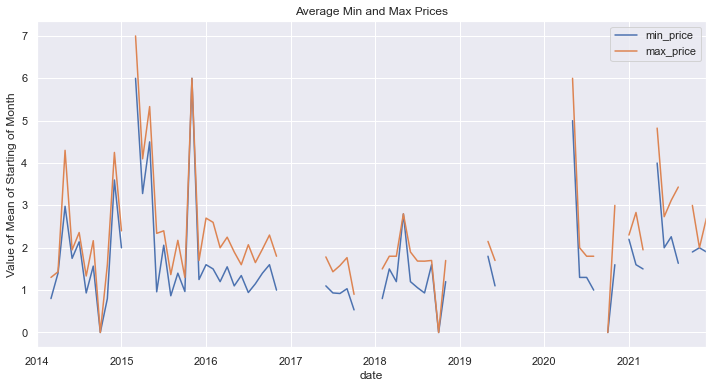

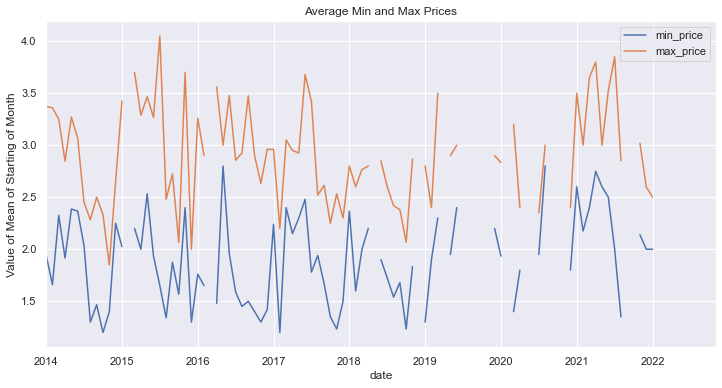

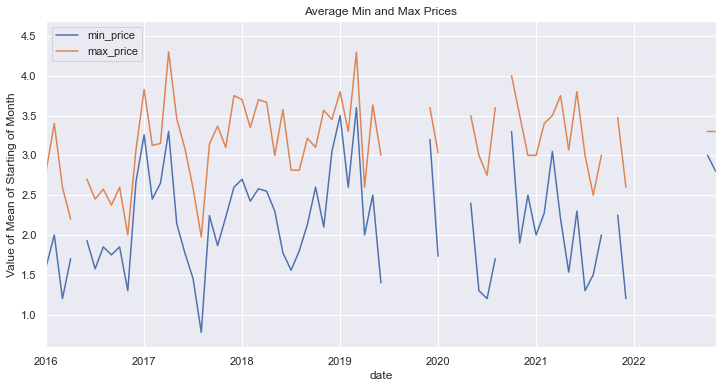

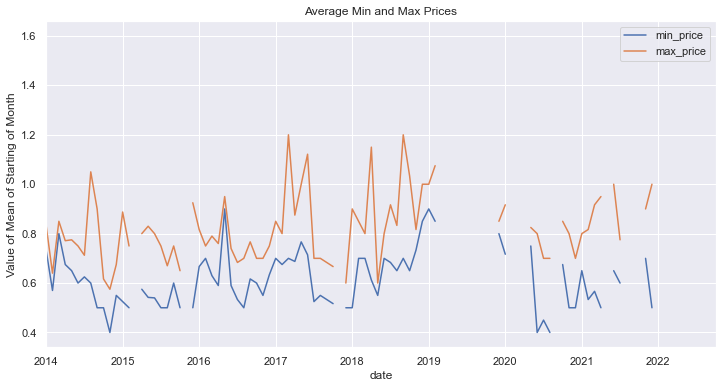

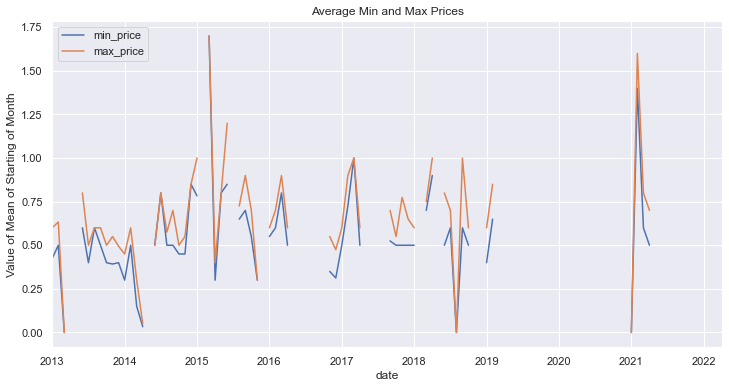

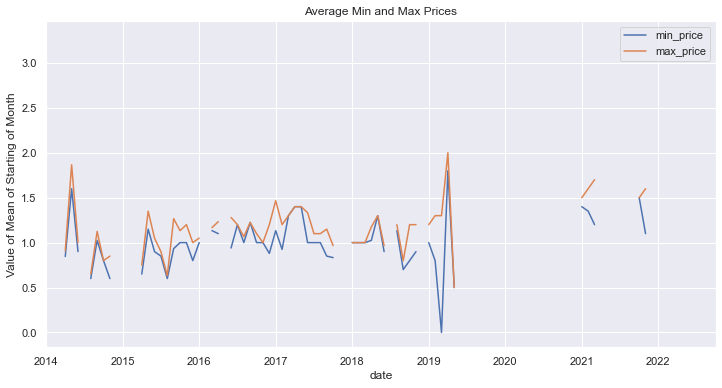

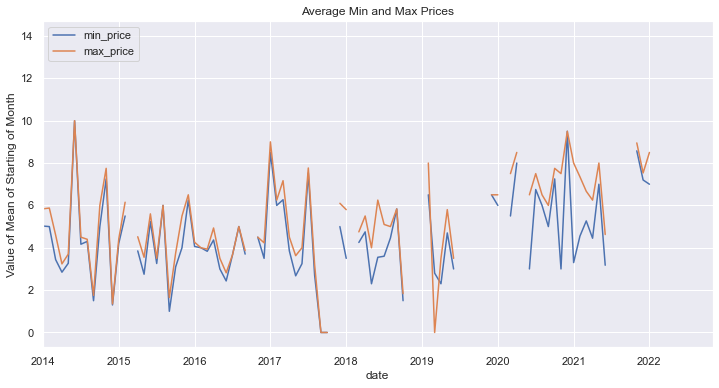

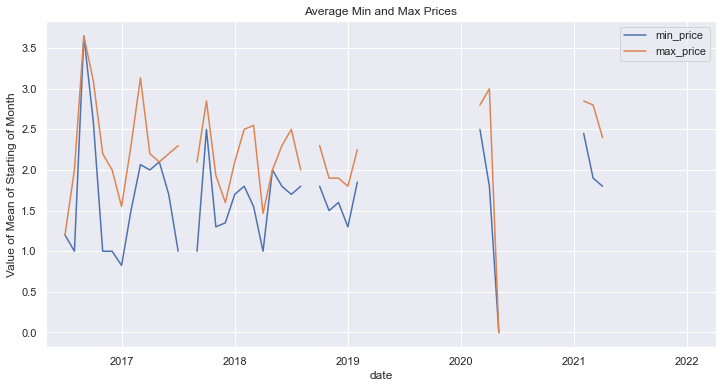

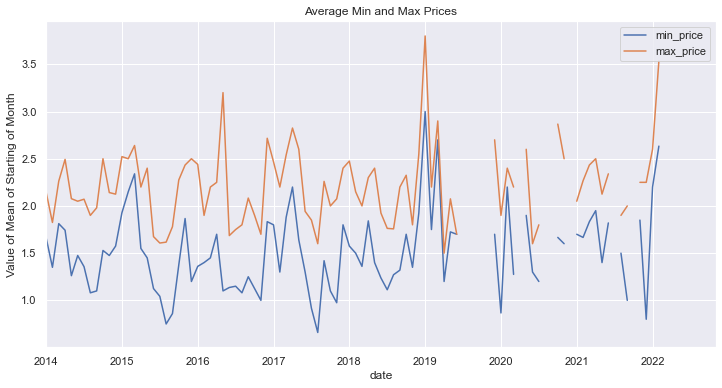

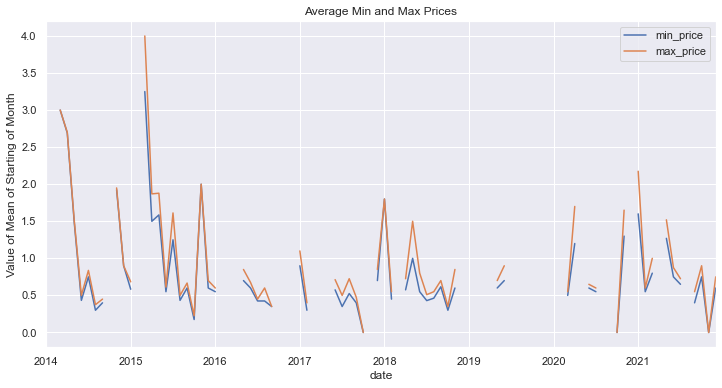

In [13]:
for item in df['item'].unique():

    sns.set(rc={'figure.figsize':(20,8.27)})
    sns.set_theme(style="darkgrid")
    
    item_df = df.loc[df['item'] == item
                    ]
    ax = item_df.resample(rule='MS').mean().plot(figsize=(12,6))
    ax.set(title='Average Min and Max Prices', ylabel='Value of Mean of Starting of Month')
    plt.show()


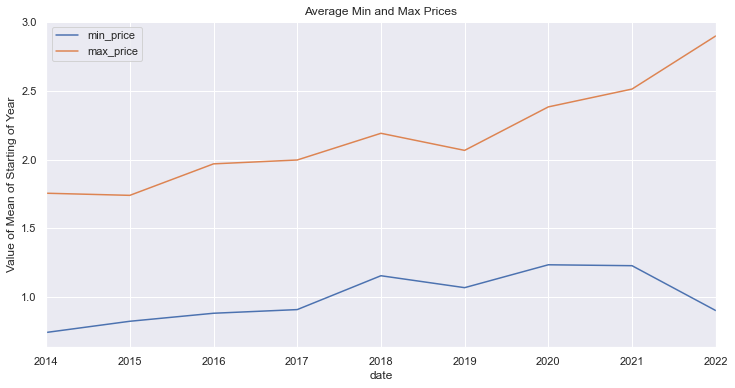

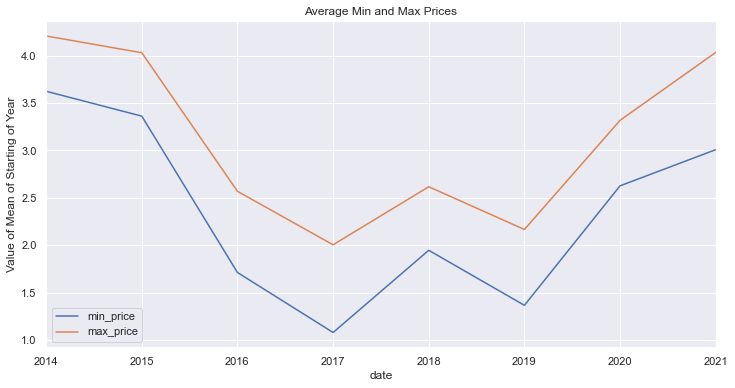

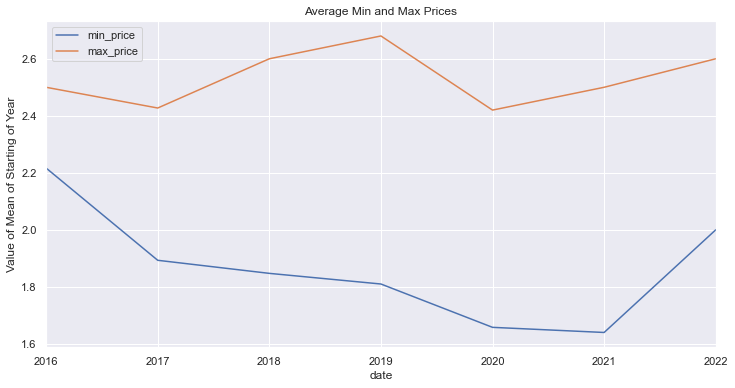

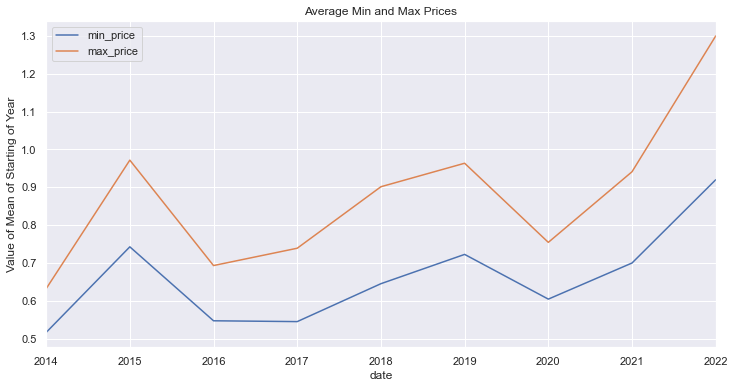

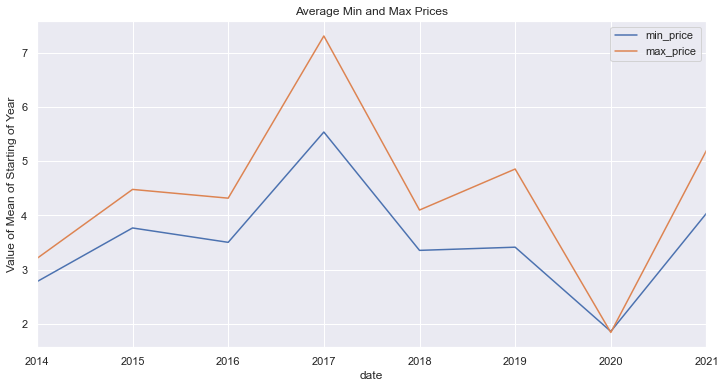

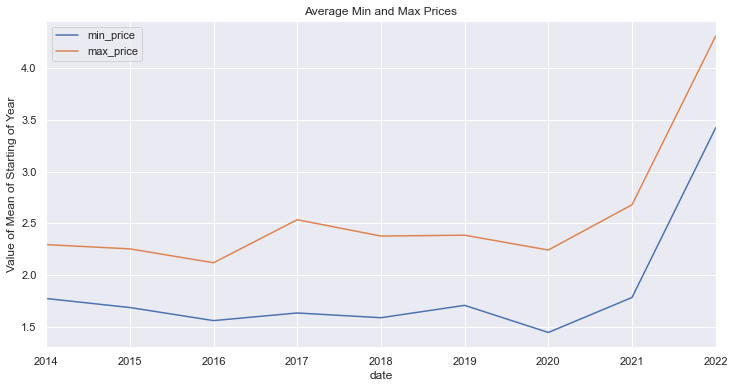

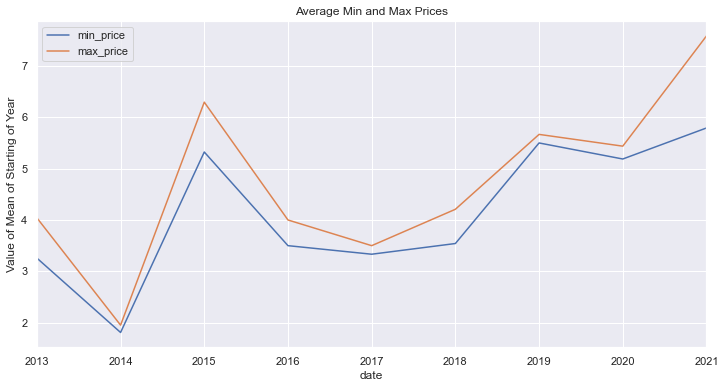

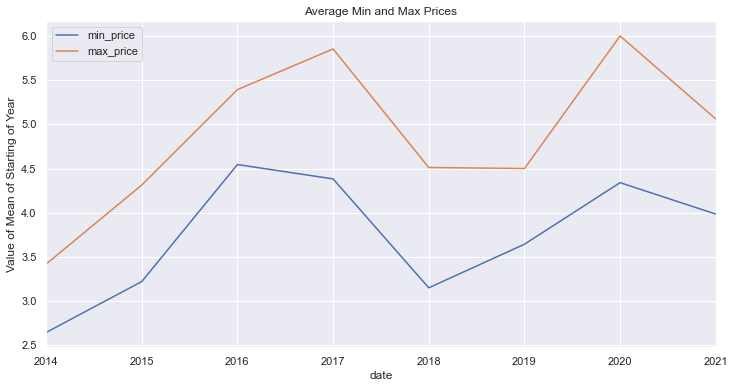

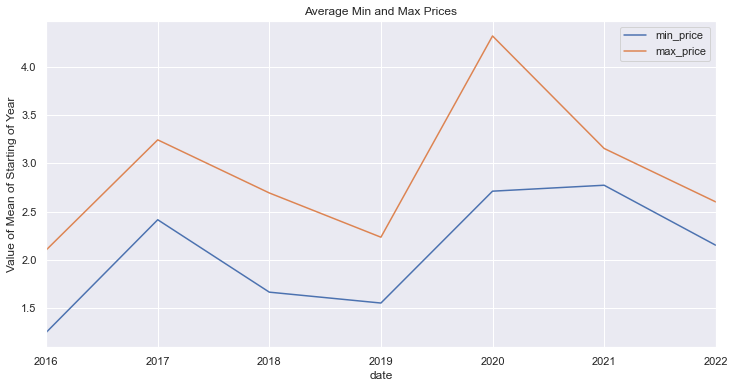

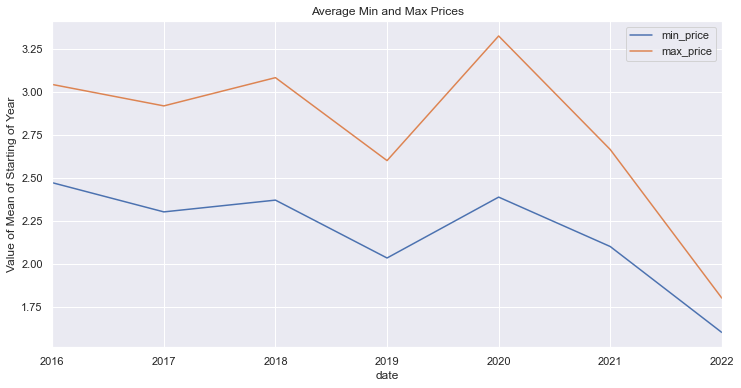

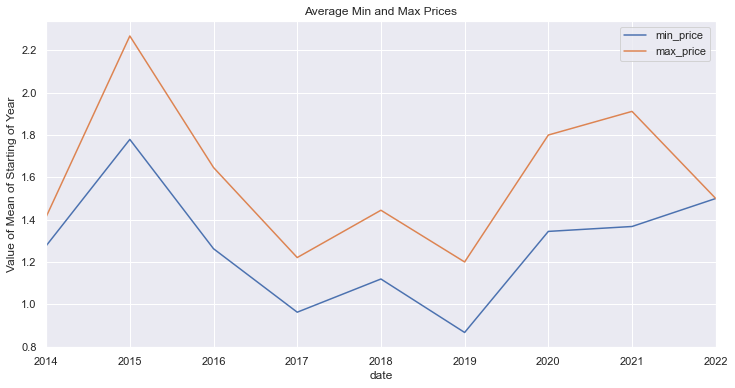

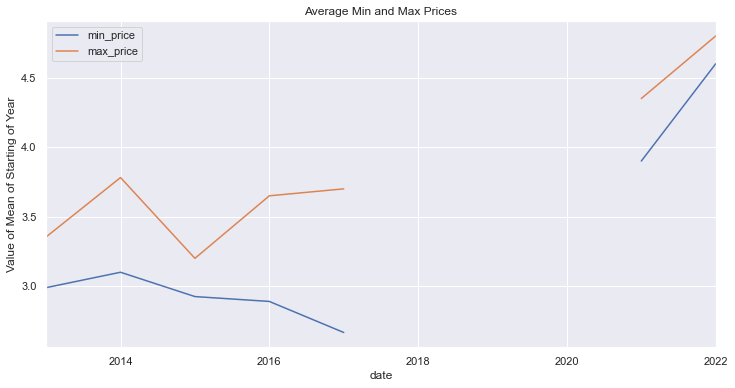

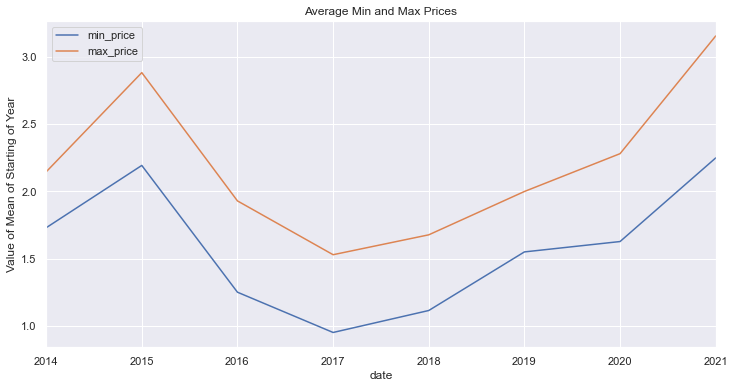

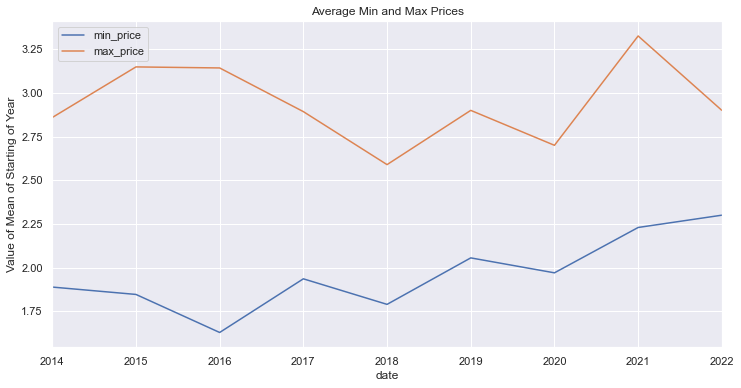

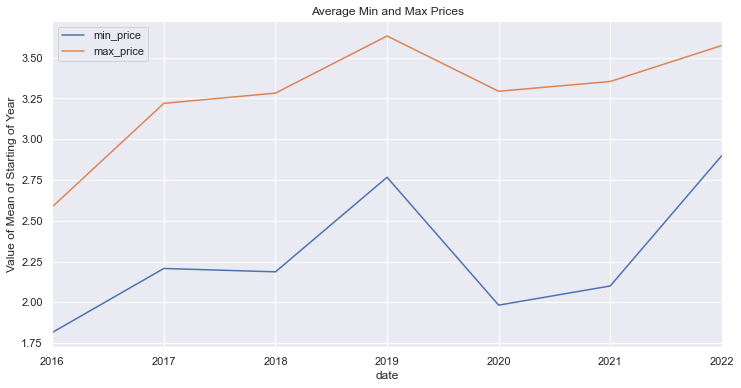

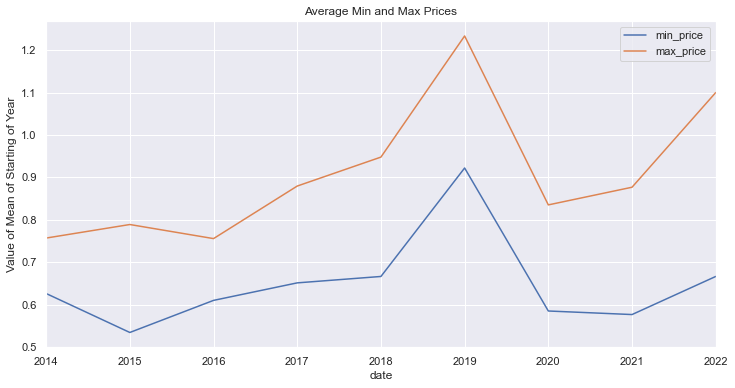

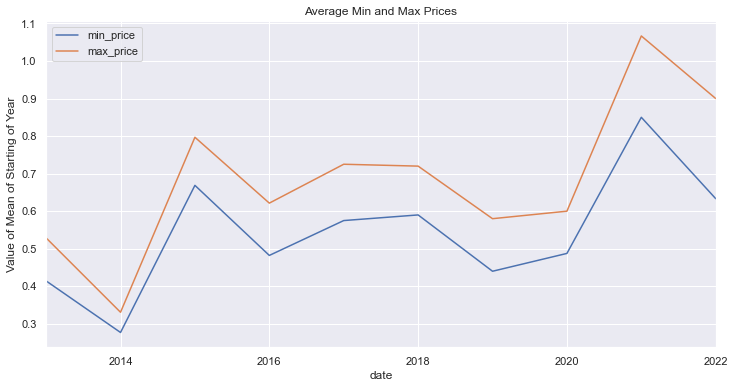

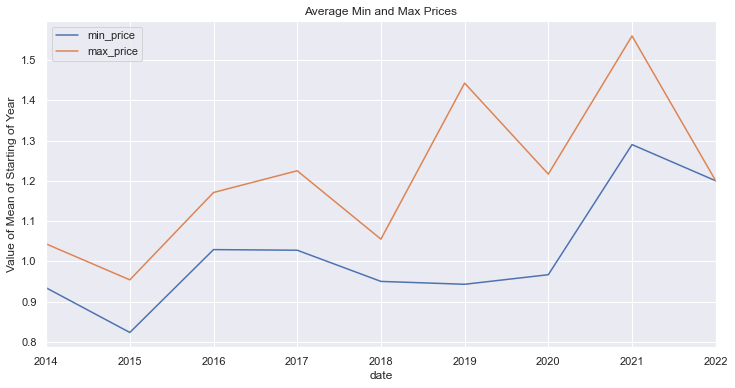

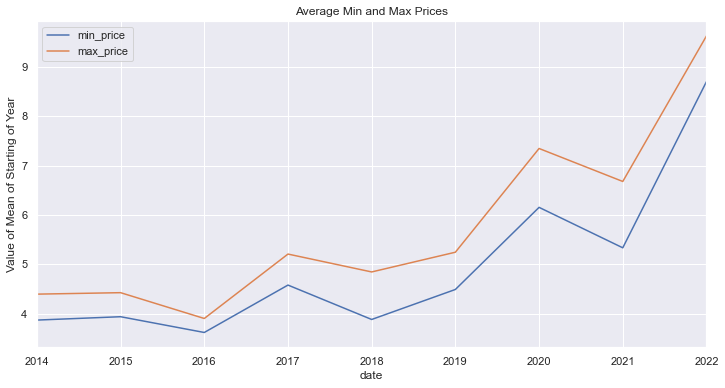

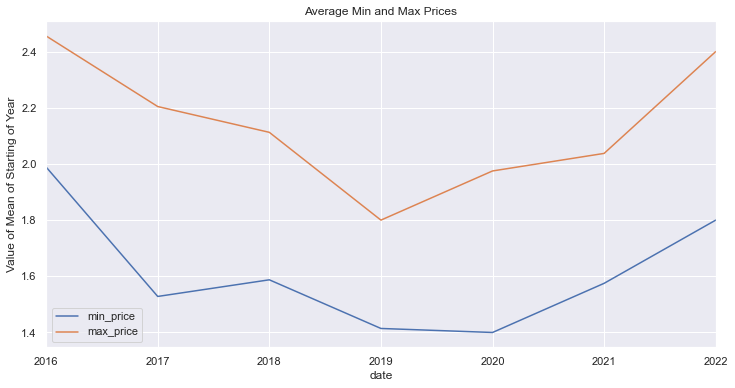

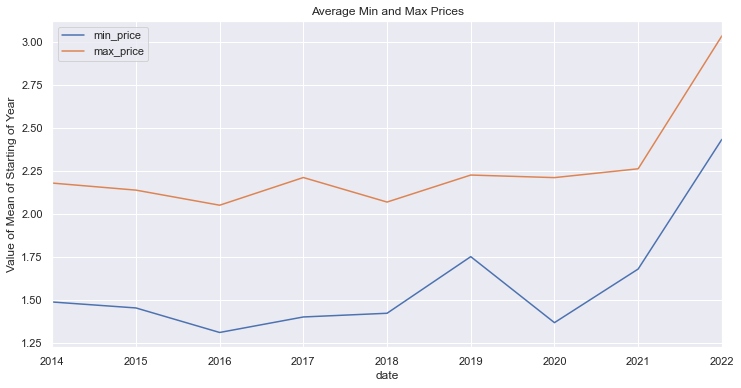

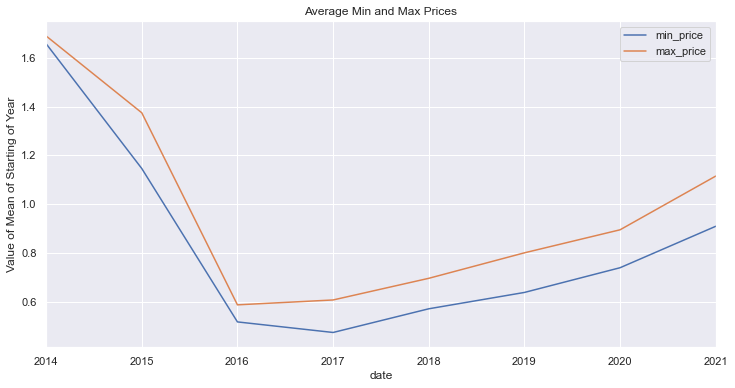

In [14]:
for item in df['item'].unique():

    sns.set(rc={'figure.figsize':(20,8.27)})
    sns.set_theme(style="darkgrid")
    
    item_df = df.loc[df['item'] == item
                    ]
    ax = item_df.resample(rule='AS').mean().plot(figsize=(12,6))
    ax.set(title='Average Min and Max Prices', ylabel='Value of Mean of Starting of Year')
    plt.show()

### Year Wise

In [15]:
import itertools


p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [16]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [18]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly

ModuleNotFoundError: No module named 'fbprophet'

In [19]:
pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached pystan-3.4.0-py3-none-any.whl (13 kB)
  Using cached pandas-1.4.2-cp38-cp38-win_amd64.whl (10.6 MB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached holidays-0.13-py3-none-any.whl (172 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached pysimdjson-3.2.0-cp38-cp38-win_amd64.whl (151 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement httpstan<4.8,>=4.7 (from pystan>=2.14->fbprophet) (from versions: 0.2.5, 0.3.0, 0.3.1, 0.4.0, 0.5.0, 0.6.0, 0.7.2, 0.7.3, 0.7.5, 0.7.6, 0.8.0, 0.9.0, 0.10.1)
ERROR: No matching distribution found for httpstan<4.8,>=4.7 (from pystan>=2.14->fbprophet)
